# The Simpsons Classification

The pictures used in this project are from a kaggle data set consisting of more characters in The Simpsons show. For this project I will only be using Abraham Grandpa Simpson, Bart Simpson, Homer Simpson, Lisa Simpson and Marge Simpson.
<br>
<br>
Maggie Simpson is the smallest daughter of the Simpsons family but I did not include her because the data set did not include enough pictures when compared to the rest of the family.

# Importing the Pictures

In [3]:
#import the required libraries for importing pictures
#https://www.youtube.com/watch?v=j-3vuBynnOE&t=203s
#https://medium.datadriveninvestor.com/load-in-image-classification-data-e2dfec6dfcb6
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [4]:
#choose the data path for the pictures
data_path = 'simpsons_dataset'
#label the categories
#this list will be used to itterate through the folders which contain the pictures
categories = ['abraham_grampa_simpson','bart_simpson','homer_simpson','lisa_simpson','marge_simpson']

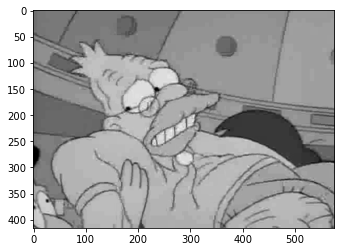

In [5]:
#create a for loop to load a picture
for category in categories:
    path = os.path.join(data_path, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

In [6]:
img_array.shape

(416, 576)

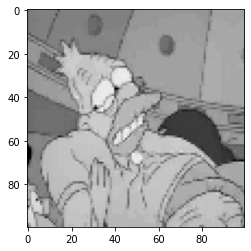

In [7]:
#choose the pixel size to normalize
img_size = 100

#show a preview for the img_size
n_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(n_array,cmap = 'gray')
plt.show()

## Create the dataset

In [8]:
#create the training data
training_data = []

#function to create the training data
def create_training_data():
    for category in categories:
        path = os.path.join(data_path, category) # path for the data
        class_num = categories.index(category) # create the class numbers by using the index of the category list
        #resize the data
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            n_array = cv2.resize(img_array, (img_size, img_size))
            training_data.append([n_array, class_num])
            
create_training_data()

In [9]:
print(len(training_data))

7146


In [10]:
#shuffle the data
import random

random.shuffle(training_data)
#display sample of the shuffled data
for sample in training_data[:10]:
    print(sample[1])

2
3
0
4
4
3
4
2
2
2


In [11]:
X = []
y = []

#create the list of features and labels
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size,1) #-1 : all, 1 : black and white images

In [18]:
print(f'Pictures: {X.shape[0]}\nPicture Resolution: {X.shape[1:3]}\nDimension: {X.shape[3]}')
print(f'Length of labels: {len(y)}')

Pictures: 7146
Picture Resolution: (100, 100)
Dimension: 1
Length of labels: 7146


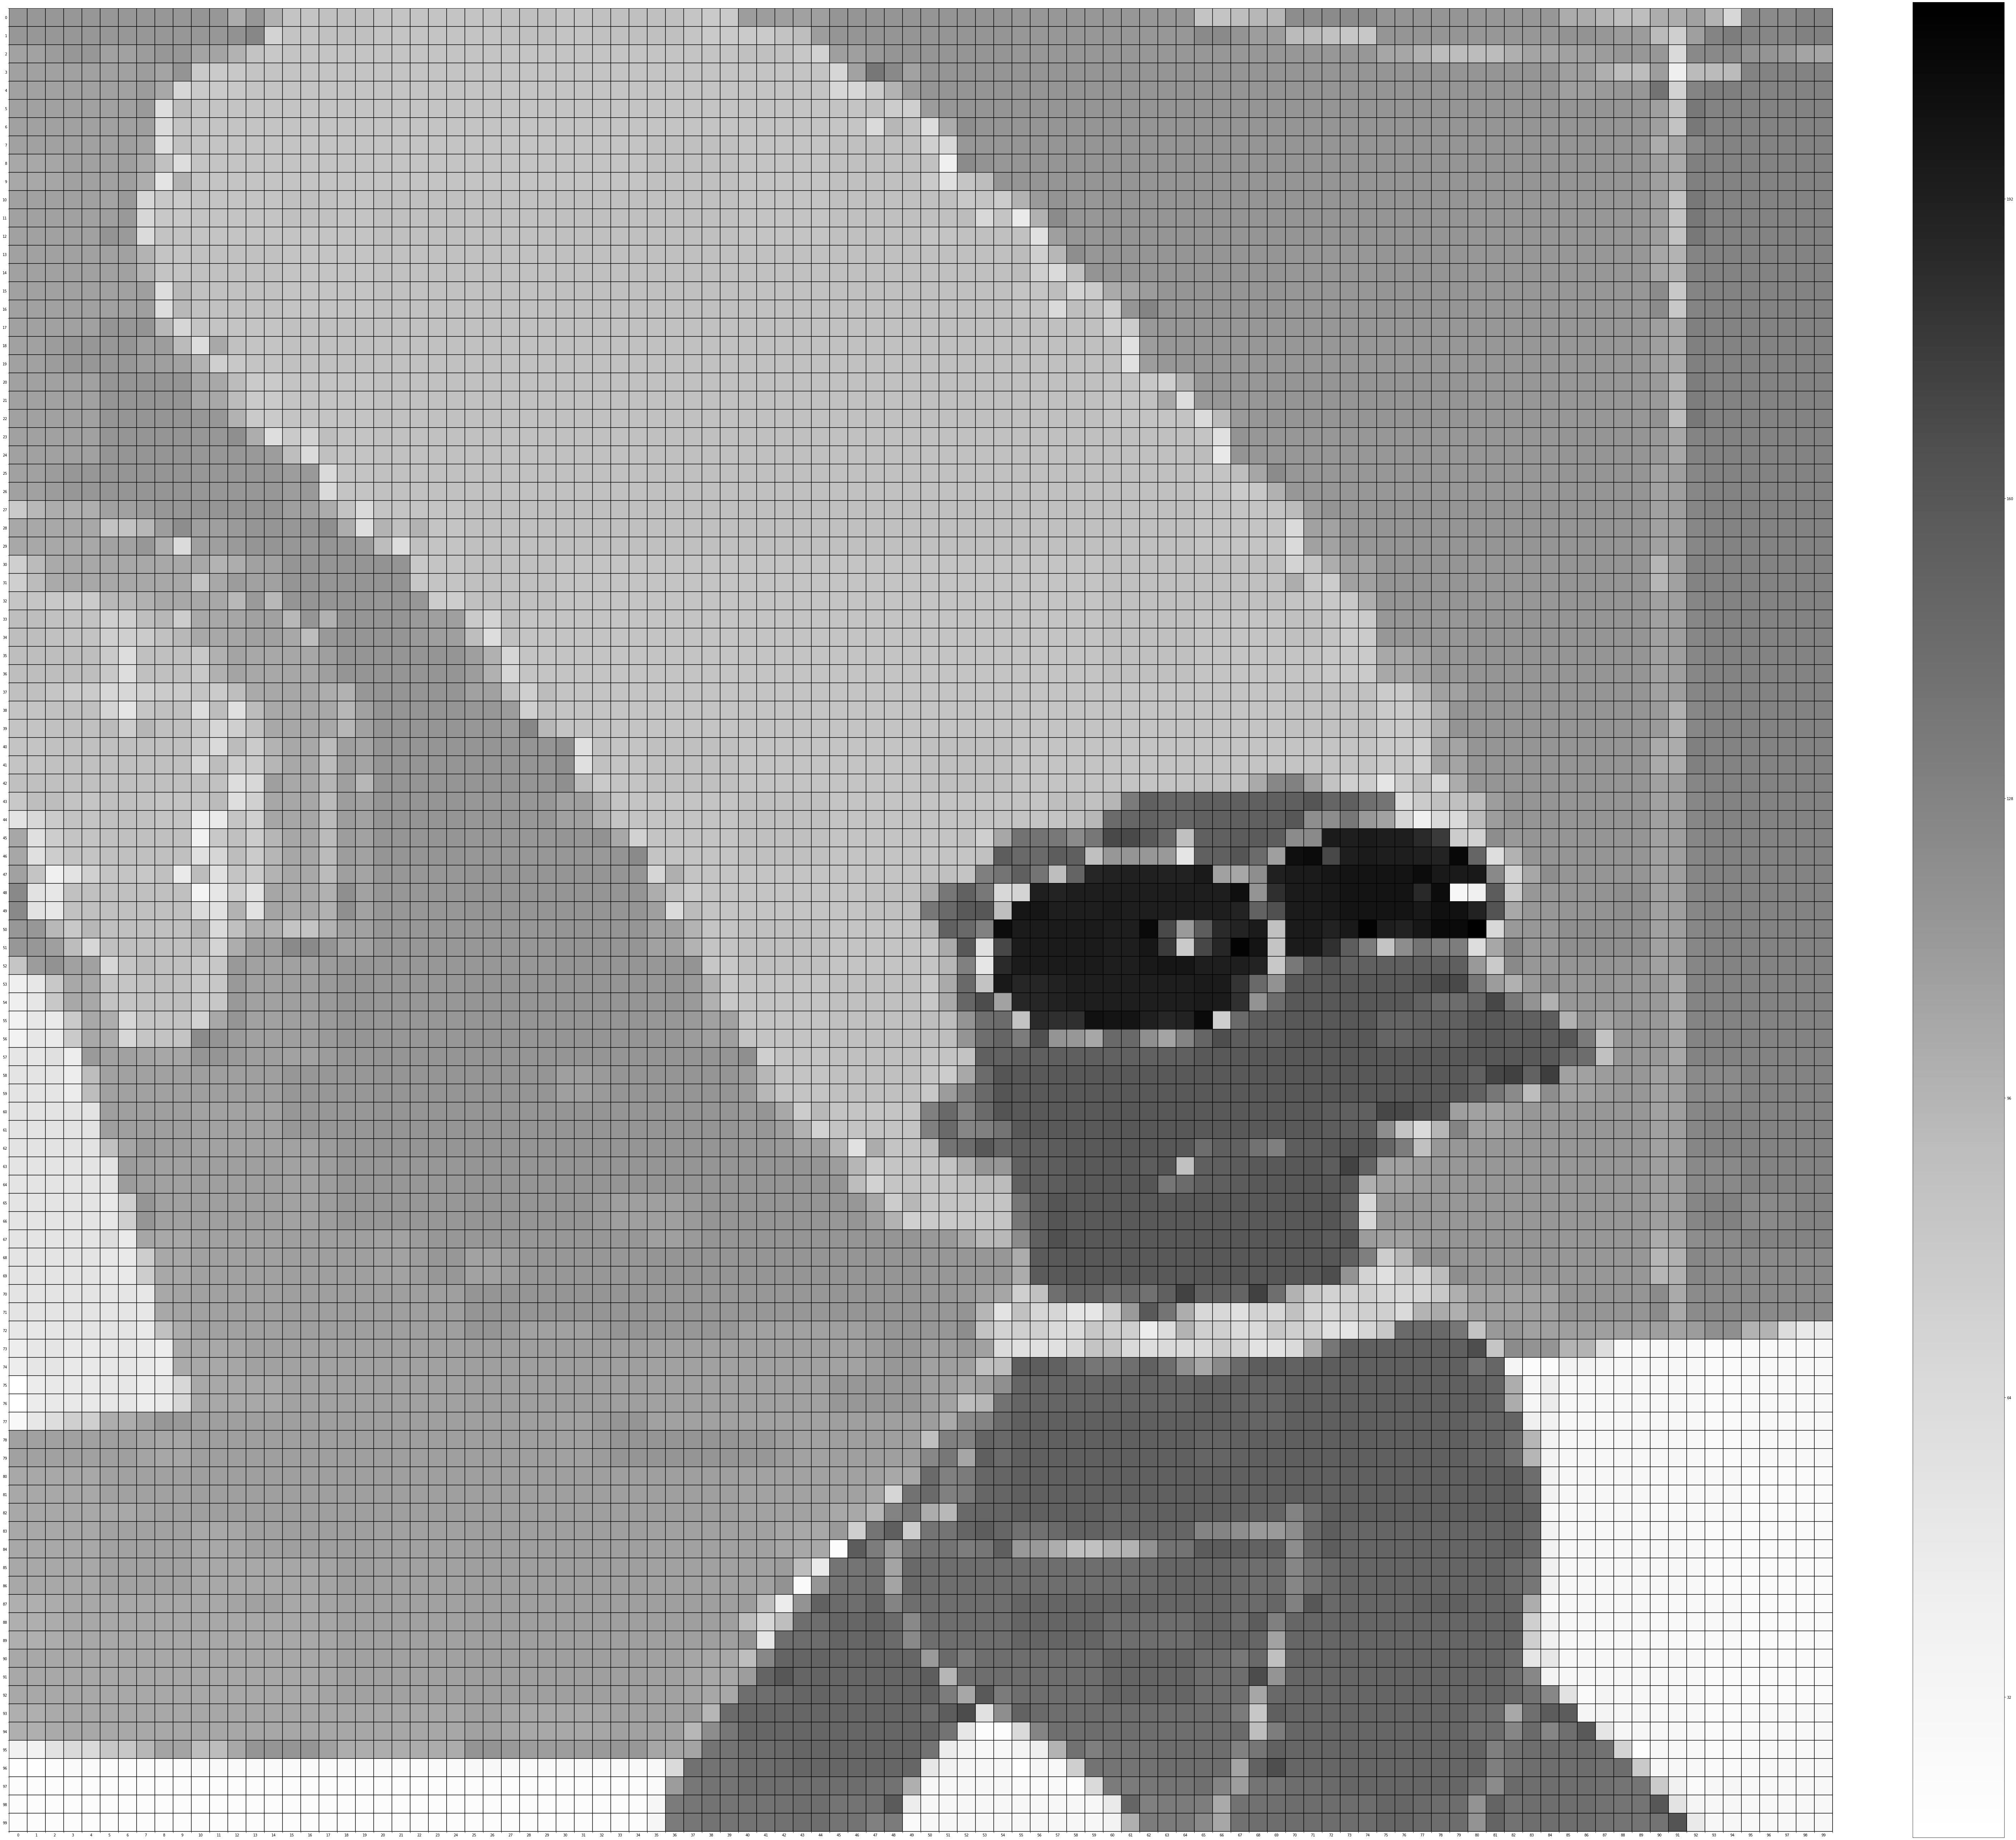

In [19]:
plt.figure(figsize = (100,100))
img = X[4]
plt.imshow(img,cmap="Greys")
ax = plt.gca()

# First turn off the  major labels, but not the major ticks
plt.tick_params(
    axis='both',        # changes apply to the both x and y axes
    which='major',      # Change the major ticks only
    bottom=True,        # ticks along the bottom edge are on
    left=True,          # ticks along the top edge are on
    labelbottom=False,  # labels along the bottom edge are off
    labelleft=False)    # labels along the left edge are off

# Next turn off the minor ticks, but not the minor labels
plt.tick_params(
    axis='both',        # changes apply to both x and y axes
    which='minor',      # Change the minor ticks only
    bottom=False,       # ticks along the bottom edge are off
    left=False,         # ticks along the left edge are off
    labelbottom=True,   # labels along the bottom edge are on
    labelleft=True)     # labels along the left edge are on

# Set the major ticks, starting at 1 (the -0.5 tick gets hidden off the canvas)
ax.set_xticks(np.arange(-.5, 100, 1))
ax.set_yticks(np.arange(-.5, 100, 1))

# Set the minor ticks and labels
ax.set_xticks(np.arange(0, 100, 1), minor=True);
ax.set_xticklabels([str(i) for i in np.arange(0, 100, 1)], minor=True);
ax.set_yticks(np.arange(0, 100, 1), minor=True);
ax.set_yticklabels([str(i) for i in np.arange(0, 100, 1)], minor=True);

ax.grid(color='black', linestyle='-', linewidth=1.5)
_ = plt.colorbar(fraction=0.046, pad=0.04, ticks=[0,32,64,96,128,160,192,224,255])

## Display some images in the dataset

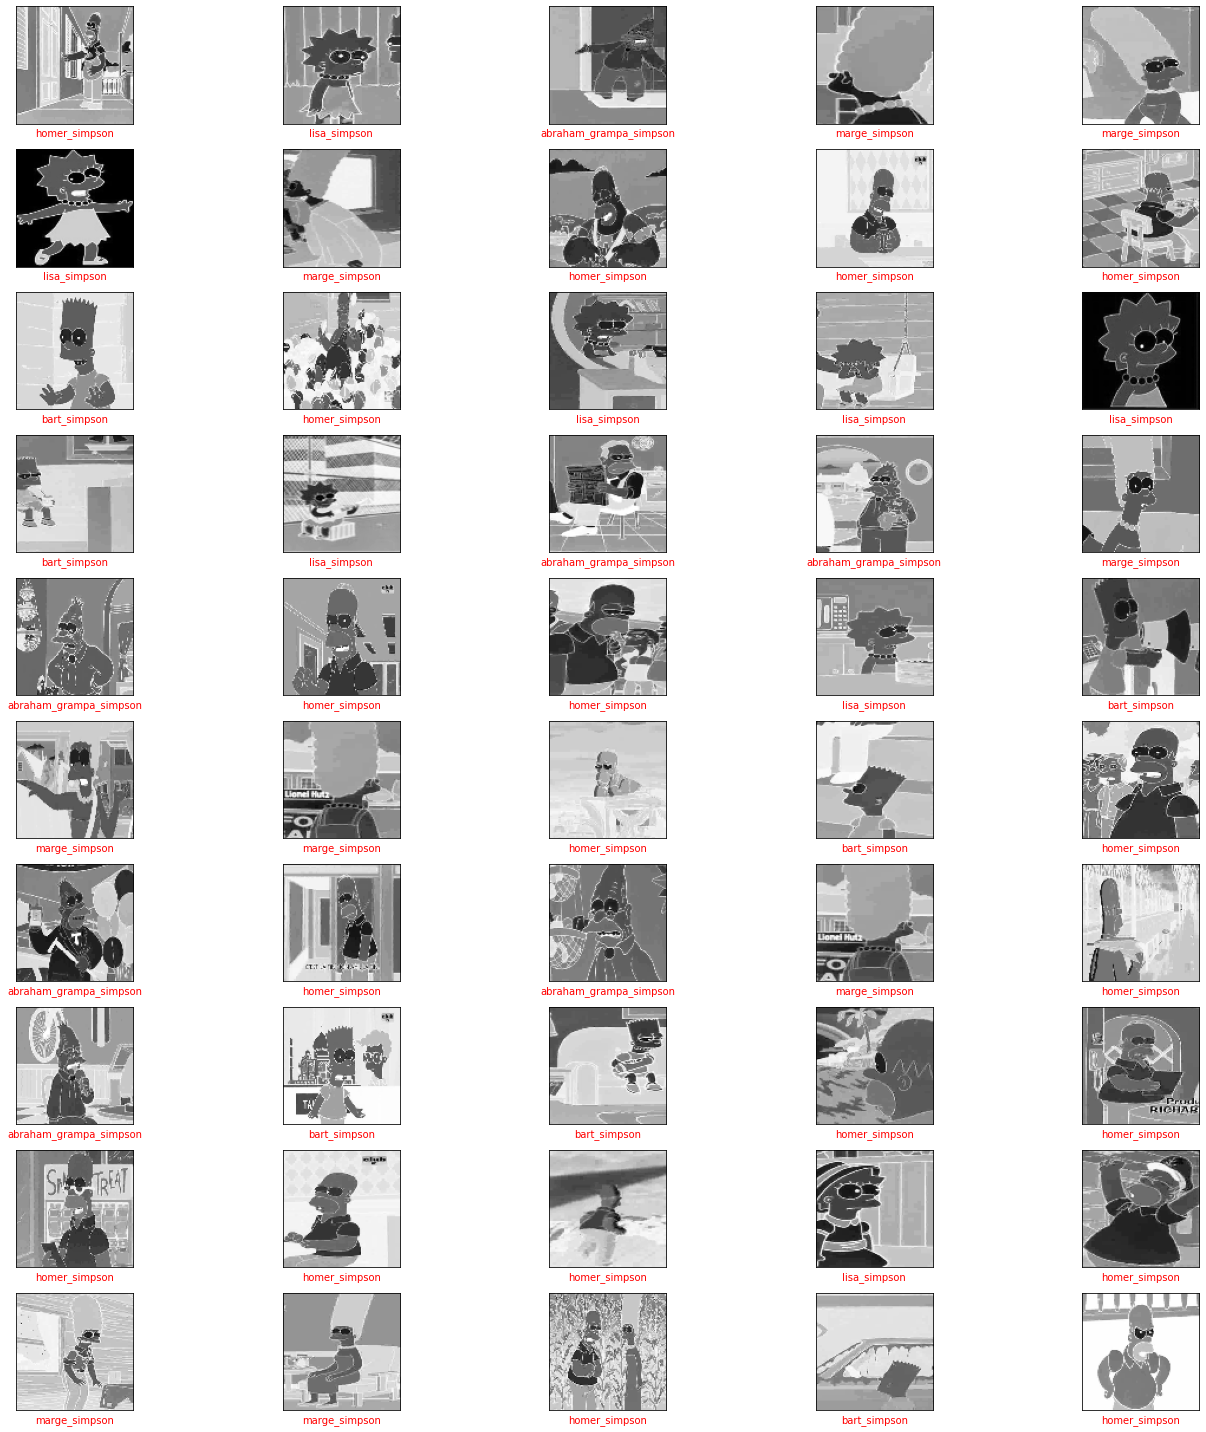

In [20]:
#set the plot size
plt.figure(figsize=(20,20))
#set a for loop to display 50 images
for k in range(50):
    #set the plot grid to display 10 rows x 5 columns of pictures
    plt.subplot(10, 5, k+1)
    plt.xticks([])
    plt.yticks([])
    #display the images in X_train cmap = 'Greys'
    plt.imshow(X[k], cmap='Greys')
    #display the class names under the image
    #use the class_names list 
    plt.xlabel(categories[y[k]], fontdict={'color':'red'})
    
plt.tight_layout()
plt.show()

In [21]:
#import some required libraries
import keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

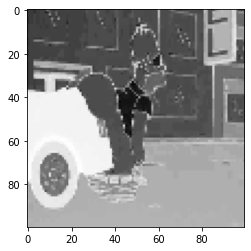

In [22]:
#print a random picture
plt.imshow(X[74], cmap = 'Greys')

In [23]:
#print the label for picture 74
#assign the label number to n
n = y[74]
#print the name of assigned to the index in n
print(categories[n])

homer_simpson


# Split the data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#use train test split to split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 101)

In [26]:
#rehape the data to a one dimensional array
#100 x 100 = 10000, the pixel size of the pictures

#get the length of the X_train, X_test
Xtrn_sz = len(X_train)
Xtst_sz = len(X_test)

#resize
X_train = X_train.reshape(Xtrn_sz, 10000).astype('float32')
X_test = X_test.reshape(Xtst_sz, 10000).astype('float32')

#divide by 255
X_train /= 255
X_test /= 255

# One-hot encoding

In [27]:
#use onehot encoding for y_train, y_test
n_classes = 5
y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, n_classes)

In [28]:
y_test.shape

(2144, 5)

# Designing the Neural Network

I will be using a Sequential model with 1 input, 1 hidden, and 1 output layer for the first run.

In [30]:
#instantiate the model
model = Sequential()

#Input layer
#input shape is the size of the picture
model.add(Dense(5, activation='sigmoid',input_shape=(10000,)))
model.add(Dense(64, activation = 'relu'))


#Output layer
model.add(Dense(5, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 50005     
                                                                 
 dense_4 (Dense)             (None, 64)                384       
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 50,714
Trainable params: 50,714
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy', optimizer = SGD(learning_rate=0.01), metrics=['accuracy'])

In [33]:
model.fit(X_train,y_train, batch_size = 64, epochs = 200, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/200
79/79 [==============================] - 0s 4ms/step - loss: 1.5953 - accuracy: 0.2615 - val_loss: 1.5796 - val_accuracy: 0.3190
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 1.5743 - accuracy: 0.3123 - val_loss: 1.5657 - val_accuracy: 0.3190
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 1.5667 - accuracy: 0.3123 - val_loss: 1.5584 - val_accuracy: 0.3190
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 1.5621 - accuracy: 0.3123 - val_loss: 1.5537 - val_accuracy: 0.3190
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 1.5578 - accuracy: 0.3123 - val_loss: 1.5500 - val_accuracy: 0.3190
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 1.5540 - accuracy: 0.3123 - val_loss: 1.5447 - val_accuracy: 0.3190
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 1.5498 - accuracy: 0.3123 - val_loss: 1.5403 - val_accuracy: 0.3190
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 3ms/step - loss: 1.3483 - accuracy: 0.4236 - val_loss: 1.3884 - val_accuracy: 0.4058
Epoch 60/200
79/79 [==============================] - 0s 3ms/step - loss: 1.3470 - accuracy: 0.4232 - val_loss: 1.4160 - val_accuracy: 0.3895
Epoch 61/200
79/79 [==============================] - 0s 3ms/step - loss: 1.3431 - accuracy: 0.4272 - val_loss: 1.3865 - val_accuracy: 0.4053
Epoch 62/200
79/79 [==============================] - 0s 3ms/step - loss: 1.3399 - accuracy: 0.4306 - val_loss: 1.4241 - val_accuracy: 0.4002
Epoch 63/200
79/79 [==============================] - 0s 3ms/step - loss: 1.3387 - accuracy: 0.4248 - val_loss: 1.5192 - val_accuracy: 0.3549
Epoch 64/200
79/79 [==============================] - 0s 3ms/step - loss: 1.3391 - accuracy: 0.4284 - val_loss: 1.3733 - val_accuracy: 0.4244
Epoch 65/200
79/79 [==============================] - 0s 3ms/step - loss: 1.3338 - accuracy: 0.4356 - val_loss: 1.3938 - val_accuracy: 0.4016
Epoch 

79/79 [==============================] - 0s 3ms/step - loss: 1.1988 - accuracy: 0.5038 - val_loss: 1.4476 - val_accuracy: 0.4165
Epoch 174/200
79/79 [==============================] - 0s 3ms/step - loss: 1.1780 - accuracy: 0.5114 - val_loss: 2.0156 - val_accuracy: 0.3428
Epoch 175/200
79/79 [==============================] - 0s 3ms/step - loss: 1.2031 - accuracy: 0.4938 - val_loss: 1.8498 - val_accuracy: 0.3507
Epoch 176/200
79/79 [==============================] - 0s 3ms/step - loss: 1.1840 - accuracy: 0.5044 - val_loss: 1.4957 - val_accuracy: 0.4030
Epoch 177/200
79/79 [==============================] - 0s 3ms/step - loss: 1.1857 - accuracy: 0.5146 - val_loss: 1.5557 - val_accuracy: 0.3885
Epoch 178/200
79/79 [==============================] - 0s 3ms/step - loss: 1.1939 - accuracy: 0.5054 - val_loss: 1.6290 - val_accuracy: 0.3773
Epoch 179/200
79/79 [==============================] - 0s 3ms/step - loss: 1.1553 - accuracy: 0.5208 - val_loss: 1.5066 - val_accuracy: 0.4160
Epoch 180/200

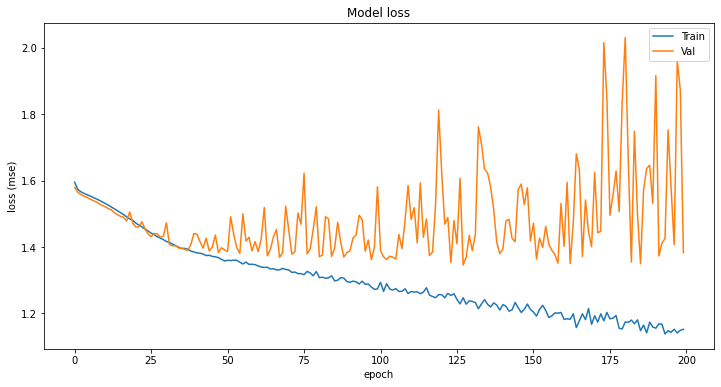

In [34]:
#set the plot size
plt.figure(figsize=(12,6))

plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])

plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')


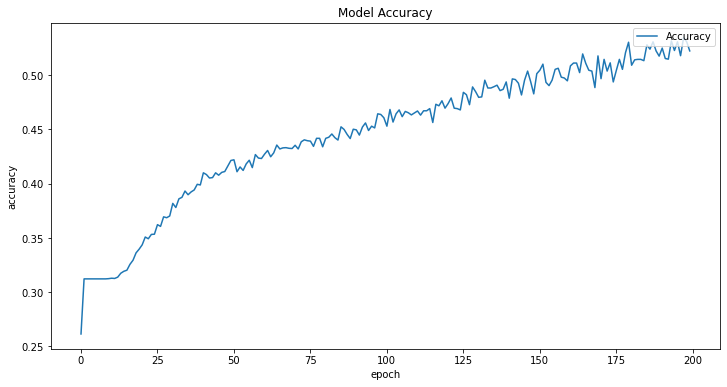

In [36]:
#set the plot size
plt.figure(figsize=(12,6))

plt.plot(model.history.history['accuracy'][:])

plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Accuracy'], loc='upper right')


Even though my accuracy is increasing, the model is overfitting and not learning. The model is not generalizing well because the validation loss keeps increasing while the training keeps decreasing.

In [41]:
predictions = model.predict(X_test)
print(f'Prediction Index 45: {np.argmax(predictions[45])}')
print(f'Prediction percentage: {predictions[45,2]}')
print(y_test[45])

Prediction Index 45: 2
Prediction percentage: 0.4292897582054138
[0. 0. 1. 0. 0.]


A random prediction above shows that the model is 42% sure that the picture is a 2. The model predicted the picture correct but with a low percentage.

# Keras

In [42]:
import numpy as np
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from tensorflow.keras.layers import BatchNormalization
#import TensorFlow datetime for TensorBoard
import tensorflow as tf
import datetime

In [43]:
# create the model
model_k1 = Sequential()

# add input and hidden layers:
model_k1.add(Dense(100, input_shape=(10000,), activation='relu'))
model_k1.add(Dense(100, activation='relu'))

# output layer
model_k1.add(Dense(5,))

model_k1.compile(optimizer='adam', loss='mse')


In [44]:
model_k1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1000100   
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 5)                 505       
                                                                 
Total params: 1,010,705
Trainable params: 1,010,705
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_k1.fit(X_train, y_train, epochs = 200, validation_data = (X_test, y_test))

Epoch 1/200
157/157 [==============================] - 1s 4ms/step - loss: 0.3073 - val_loss: 0.2122
Epoch 2/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1758 - val_loss: 0.1656
Epoch 3/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1617 - val_loss: 0.1551
Epoch 4/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1538 - val_loss: 0.1485
Epoch 5/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1478 - val_loss: 0.1504
Epoch 6/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1483 - val_loss: 0.1480
Epoch 7/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1440 - val_loss: 0.1490
Epoch 8/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1477 - val_loss: 0.1466
Epoch 9/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1438 - val_loss: 0.1454
Epoch 10/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1399 - val_lo

Epoch 161/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1072 - val_loss: 0.1691
Epoch 162/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1187 - val_loss: 0.1692
Epoch 163/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1159 - val_loss: 0.1796
Epoch 164/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1085 - val_loss: 0.1703
Epoch 165/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1172 - val_loss: 0.1711
Epoch 166/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1061 - val_loss: 0.1706
Epoch 167/200
157/157 [==============================] - 1s 4ms/step - loss: 0.1053 - val_loss: 0.1650
Epoch 168/200
157/157 [==============================] - 1s 4ms/step - loss: 0.0901 - val_loss: 0.1611
Epoch 169/200
157/157 [==============================] - 1s 4ms/step - loss: 0.0900 - val_loss: 0.1739
Epoch 170/200
157/157 [==============================] - 1s 4ms/step - lo

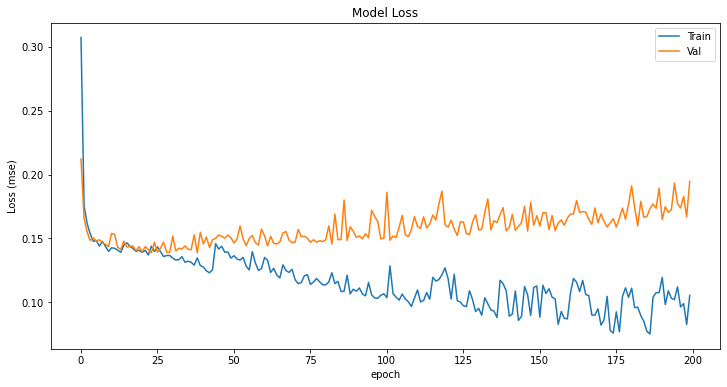

In [46]:
plt.figure(figsize = (12,6))

plt.plot(model_k1.history.history['loss'][:])
plt.plot(model_k1.history.history['val_loss'][:])

plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss (mse)')
plt.legend(['Train', 'Val'], loc = 'upper right')

This model is still showing signs of overfitting with the validation value increasing and the training value decreasing.

# Searching for parameters

In [47]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [62]:
#model function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim = 10000, activation = 'relu'))
    model.add(Dense(5, activation = 'softmax'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

In [63]:
model_2 = KerasClassifier(model = create_model, verbose = 0)

In [64]:
#gridsearch parameters
batch_size = [40,60,120]
epochs = [60,100,150,200]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model_2, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X_train,y_train)

In [65]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean , stdev, params, in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, params))

Best: 0.448023 using {'batch_size': 60, 'epochs': 150}
0.416832 (0.033467) with: {'batch_size': 40, 'epochs': 60}
0.407243 (0.028075) with: {'batch_size': 40, 'epochs': 100}
0.440029 (0.018641) with: {'batch_size': 40, 'epochs': 150}
0.401437 (0.022085) with: {'batch_size': 40, 'epochs': 200}
0.405642 (0.042245) with: {'batch_size': 60, 'epochs': 60}
0.426830 (0.014059) with: {'batch_size': 60, 'epochs': 100}
0.448023 (0.007983) with: {'batch_size': 60, 'epochs': 150}
0.442625 (0.006081) with: {'batch_size': 60, 'epochs': 200}
0.424430 (0.011467) with: {'batch_size': 120, 'epochs': 60}
0.428633 (0.016139) with: {'batch_size': 120, 'epochs': 100}
0.446424 (0.009309) with: {'batch_size': 120, 'epochs': 150}
0.444226 (0.021741) with: {'batch_size': 120, 'epochs': 200}


In [73]:
def create_model_opt(optimizer = 'adam'):
    
    model = Sequential()
    
    model.add(Dense(64, input_dim = 10000, activation = 'relu'))
    
    model.add(Dense(5, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [74]:
#use batch size 60 and epochs 150
model_opt = KerasClassifier(model = create_model_opt, epochs = 150, batch_size = 60, verbose = 0)

In [75]:
optimizer = ['SGD','GD','Adam']

param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator = model_opt, param_grid = param_grid, cv = 3)

grid_result = grid.fit(X_train, y_train)

In [76]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean , stdev, params, in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, params))

Best: 0.448020 using {'optimizer': 'GD'}
0.443020 (0.013800) with: {'optimizer': 'SGD'}
0.448020 (0.011729) with: {'optimizer': 'GD'}
0.435832 (0.022646) with: {'optimizer': 'Adam'}


In [124]:
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

In [129]:
def create_model_n(neurons = 1):
    model = Sequential()
    
    model.add(Dense(neurons, input_dim = 10000, activation = 'relu'))
    model.add(Dense(5, activation = 'sigmoid'))
    
    optimizer = SGD(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

In [130]:
model_n = KerasClassifier(build_fn = create_model_n, epochs = 150, batch_size = 60, verbose = 0)

<ipython-input-130-7a8b4b1934ef>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_n = KerasClassifier(build_fn = create_model_n, epochs = 150, batch_size = 60, verbose = 0)


In [131]:
neurons = [32,64,128]

param_grid = dict(neurons = neurons)
grid = GridSearchCV(estimator = model_n, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X_train, y_train)

In [132]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean , stdev, params, in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, params))

Best: 0.440222 using {'neurons': 64}
0.433427 (0.011052) with: {'neurons': 32}
0.440222 (0.005654) with: {'neurons': 64}
0.426632 (0.009653) with: {'neurons': 128}


In [135]:
model_f = Sequential()

model_f.add(Dense(64, input_shape = (10000,), activation = 'relu'))

model_f.add(Dense(5, activation = 'sigmoid'))

model_f.compile(optimizer = SGD(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [137]:
model_f.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 64)                640064    
                                                                 
 dense_70 (Dense)            (None, 5)                 325       
                                                                 
Total params: 640,389
Trainable params: 640,389
Non-trainable params: 0
_________________________________________________________________


In [139]:
model_f.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 60, epochs = 150)

Epoch 1/150
84/84 [==============================] - 1s 5ms/step - loss: 0.4994 - accuracy: 0.2995 - val_loss: 0.4889 - val_accuracy: 0.3470
Epoch 2/150
84/84 [==============================] - 0s 4ms/step - loss: 0.4878 - accuracy: 0.3227 - val_loss: 0.4801 - val_accuracy: 0.3503
Epoch 3/150
84/84 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.3299 - val_loss: 0.4766 - val_accuracy: 0.3428
Epoch 4/150
84/84 [==============================] - 0s 4ms/step - loss: 0.4745 - accuracy: 0.3395 - val_loss: 0.4694 - val_accuracy: 0.3643
Epoch 5/150
84/84 [==============================] - 0s 4ms/step - loss: 0.4702 - accuracy: 0.3535 - val_loss: 0.4729 - val_accuracy: 0.3419
Epoch 6/150
84/84 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.3601 - val_loss: 0.4638 - val_accuracy: 0.3825
Epoch 7/150
84/84 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.3649 - val_loss: 0.4598 - val_accuracy: 0.3745
Epoch 8/150
8

Epoch 59/150
84/84 [==============================] - 0s 4ms/step - loss: 0.3948 - accuracy: 0.5374 - val_loss: 0.4290 - val_accuracy: 0.4729
Epoch 60/150
84/84 [==============================] - 0s 4ms/step - loss: 0.3935 - accuracy: 0.5440 - val_loss: 0.4343 - val_accuracy: 0.4389
Epoch 61/150
84/84 [==============================] - 0s 4ms/step - loss: 0.3914 - accuracy: 0.5522 - val_loss: 0.4287 - val_accuracy: 0.4622
Epoch 62/150
84/84 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.5414 - val_loss: 0.4368 - val_accuracy: 0.4543
Epoch 63/150
84/84 [==============================] - 0s 4ms/step - loss: 0.3906 - accuracy: 0.5498 - val_loss: 0.4243 - val_accuracy: 0.4753
Epoch 64/150
84/84 [==============================] - 0s 4ms/step - loss: 0.3886 - accuracy: 0.5552 - val_loss: 0.4233 - val_accuracy: 0.4734
Epoch 65/150
84/84 [==============================] - 0s 4ms/step - loss: 0.3875 - accuracy: 0.5570 - val_loss: 0.4235 - val_accuracy: 0.4841
Epoch 

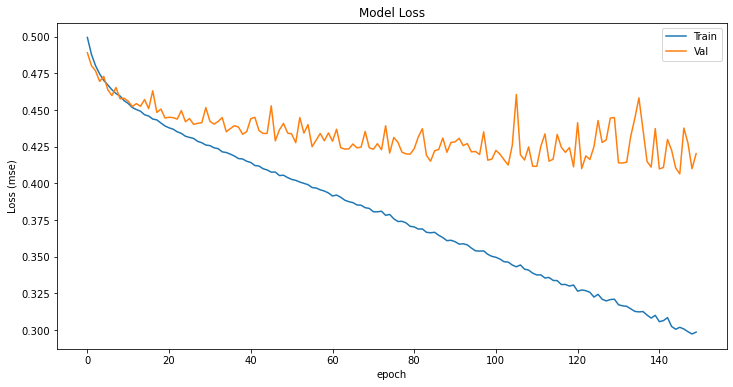

In [140]:
plt.figure(figsize = (12,6))

plt.plot(model_f.history.history['loss'][:])
plt.plot(model_f.history.history['val_loss'][:])

plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss (mse)')
plt.legend(['Train', 'Val'], loc = 'upper right')

The model still seems to be overfitting since the validation data is not following the training data. The final accuracy that was recorded for this model was for .7149.

# Testing some Predictions

In [143]:
from sklearn.metrics import mean_absolute_error

y_pred = model_f.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

y_pred[0:5]

array([[0.2214542 , 0.03584921, 0.5438147 , 0.07042196, 0.06024972],
       [0.0921945 , 0.23414376, 0.3868413 , 0.0164125 , 0.01168159],
       [0.0733279 , 0.4569962 , 0.4588291 , 0.06705418, 0.00583184],
       [0.11975482, 0.3903314 , 0.06527489, 0.04676288, 0.52642345],
       [0.20460346, 0.06281206, 0.6332394 , 0.12304536, 0.02162343]],
      dtype=float32)

In [165]:
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.2560097873210907


[0.15854263 0.15117195 0.3441413  0.10351318 0.01676461]
[0. 0. 1. 0. 0.]


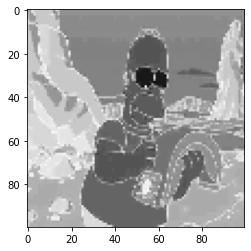

In [179]:
n = 9
print(y_pred[n])
print(y_test[n])
plt.imshow(X_test[n].reshape((100,100)), cmap = 'Greys')

The model was able to predict the correct label for the picture in index 9 of the dataset. 

In [169]:
print(categories)

['abraham_grampa_simpson', 'bart_simpson', 'homer_simpson', 'lisa_simpson', 'marge_simpson']


[0.22869617 0.26667434 0.08584061 0.5727961  0.0322535 ]
[0. 0. 1. 0. 0.]


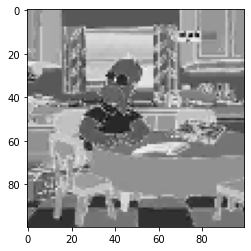

In [181]:
n = 34
print(y_pred[n])
print(y_test[n])
plt.imshow(X_test[n].reshape((100,100)), cmap = 'Greys')

# Summary 
<br>
In this project I tried to classify Simpson characters from the television show The Simpsons. The only characters I used was for the Simpson family except for Maggie Simpson because there were not enough pictures of that character.
<br>
I was able to build a couple of models with the final model acheiving an accuracy score of .7149. The model still showed signs of overfitting however. 